In [25]:
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from soft_align import find_homologous_pos
import torch

In [3]:
data_dir = "/Users/rsawhney/dev/protein_embed_softalign/data/"

In [4]:
seqs = SeqIO.to_dict(SeqIO.parse(f"{data_dir}93_pol_A_seqs.fasta", "fasta"))
type(seqs)



dict

In [10]:
embeddings_dir = f"{data_dir}/pola_embeddings"

In [ ]:
ref_seq_name = 'Escheria_coli_IAI39_POL_ref'

In [11]:
str(seqs['ref_seq_name'].seq)[0:100]

'MVQIPQNPLILVDGSSYLYRAYHAFPPLTNSAGEPTGAMYGVLNMLRSLIMQYKPTHAAVVFDAKGKTFRDELFEHYKSHRPPMPDDLRAQIEPLHAMVK'

In [12]:
seq_names = list(seqs.keys())
seq_names[0:5]

['Escheria_coli_IAI39_POL_ref',
 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I',
 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I',
 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P',
 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P']

In [20]:
homologs = defaultdict(dict)
seq_1_pos = 761
seq_1_name = 'Escheria_coli_IAI39_POL_ref'
seq_1_str = str(seqs[seq_1_name].seq)
seq_1_embedding = torch.load(f"{embeddings_dir}/{seq_1_name}.pt")
for seq_name in seq_names[1:]:
    print(f"Comparing 'Escheria_coli_IAI39_POL_ref' and {seq_name}")
    seq_2_str = str(seqs[seq_name].seq)
    seq_2_embedding = torch.load(f"{embeddings_dir}/{seq_name}.pt")    
    homologs[seq_1_name][seq_name] =  find_homologous_pos(seq_1_str, seq_1_pos, seq_2_str, seq_1_embedding, seq_2_embedding)
    print("Done")



Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_15_length_88571_pol762_L_rnr438_I
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_8_NODE_36_length_107729_pol762_L_rnr438_I
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_7_NODE_69_length_56267_pol762_L_rnr438_P
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_8_NODE_76_length_74904_pol762_L_rnr438_P
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na
Done
Comparing 'Escheria_coli_IAI39_POL_ref' and RI_2_NO

In [21]:
homologs

defaultdict(dict,
            {'Escheria_coli_IAI39_POL_ref': {'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': 578,
              'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': 582,
              'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': 442,
              'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': 559,
              'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': 409,
              'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': 442,
              'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': 441,
              'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': 202,
              'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': 442,
              'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': 451,
              'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na': 428,
              'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na': 4

In [22]:
homologs

defaultdict(dict,
            {'Escheria_coli_IAI39_POL_ref': {'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': 578,
              'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': 582,
              'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': 442,
              'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': 559,
              'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': 409,
              'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': 442,
              'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': 441,
              'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': 202,
              'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': 442,
              'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': 451,
              'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na': 428,
              'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na': 4

In [42]:
list(homologs['Escheria_coli_IAI39_POL_ref'].items())[:3]

[('RI_1_NODE_15_length_88571_pol762_L_rnr438_I', 578),
 ('RI_8_NODE_36_length_107729_pol762_L_rnr438_I', 582),
 ('RI_7_NODE_69_length_56267_pol762_L_rnr438_P', 442)]

In [23]:
'''
Use homologs to build nx graph
1. iterate over homologs and 1) add_node(seq_name, seq_pos)-> return node_id, 2) make_edge(node_id1, node_id2) # where node_id1 is the node for seq1, and node_id2 is the node for seq2
   NOTE: there can be more than 1 nodes for a seq, eg, seq10 can have 5 nodes that are homologous to seq1 ref_node
2. starting from seq1 ref pos, return path along nodes with highest degree
3. parallize/optimize
'''

'\nUse homologs to build nx graph\n1. iterate over homologs and 1) add_node(seq_name, seq_pos)-> return node_id, 2) make_edge(node_id1, node_id2) # where node_id1 is the node for seq1, and node_id2 is the node for seq2\n   NOTE: there can be more than 1 nodes for a seq, eg, seq10 can have 5 nodes that are homologous to seq1 ref_node\n2. starting from seq1 ref pos, return path along nodes with highest degree\n'

In [49]:
ref_seq_name = 'Escheria_coli_IAI39_POL_ref'

In [124]:
ref_homologs = homologs[ref_seq_name]
type(ref_homologs)

dict

In [115]:
def get_homologous_graph(ref_seq_name, ref_seq_pos, homologs):
    # initialize directed graph
    G = nx.DiGraph()
    # add node for ref_seq_name - append pos to name to allow for multiple position for a single sequence
    G.add_node(f"{ref_seq_name}_{ref_seq_pos}", name=ref_seq_name, pos=ref_seq_pos)
    seq_names = [ref_seq_name]
    seq_names.extend(list(homologs[ref_seq_name].keys()))
    ref_homologs = homologs[ref_seq_name]
    for idx, seq_1_name in enumerate(seq_names):
        if (seq_1_name != ref_seq_name):
            seq_1_pos = ref_homologs[seq_1_name]
            G.add_node(f"{seq_1_name}_{seq_1_pos}", name=seq_1_name, pos=seq_1_pos)
        else:
            seq_1_pos=ref_seq_pos
        for seq_2_name in seq_names[idx+1:]:
            seq_2_pos = ref_homologs[seq_2_name]
            # add node
            G.add_node(f"{seq_2_name}_{seq_2_pos}", name=seq_2_name, pos=seq_2_pos)
            # add edge from ref_seq to seq
            # print(f"Adding edge between {seq_1_name}_{seq_1_pos} and {seq_2_name}_{seq_2_pos}")
            G.add_edge(f"{seq_1_name}_{seq_1_pos}", f"{seq_2_name}_{seq_2_pos}")
    return G   

In [118]:
G = get_homologous_graph(seq_1_name, seq_1_pos, homologs)
print(list(G.edges())[10:20])

[('Escheria_coli_IAI39_POL_ref_761', 'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na_442'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na_451'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na_428'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na_401'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_5_NODE_22231_length_2797_pol762_L_rnr438_Na_445'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_6_NODE_4881_length_6792_pol762_L_rnr438_Na_442'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_7_NODE_6171_length_6187_pol762_L_rnr438_Na_442'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_8_NODE_291_length_46820_pol762_L_rnr438_Na_444'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_8_NODE_1778_length_21288_pol762_L_rnr438_Na_424'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_8_NODE_2111_length_19237_pol762_L_rnr438_Na_444')]


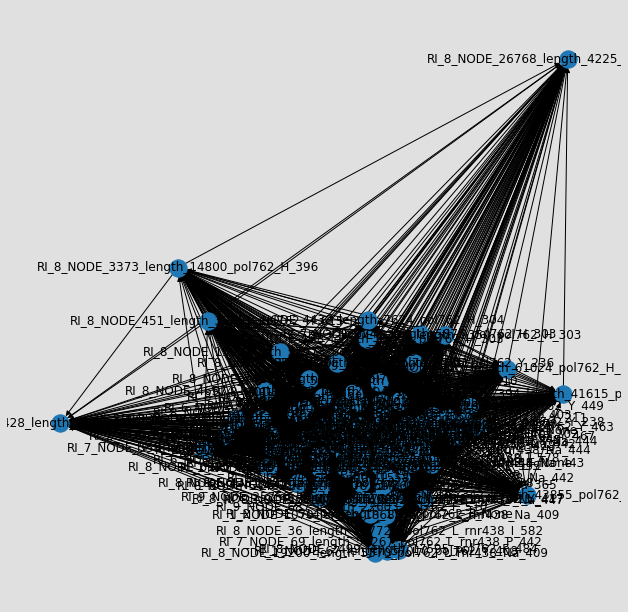

In [125]:
# display graph
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [121]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]

[('Escheria_coli_IAI39_POL_ref_761', 92),
 ('RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578', 92),
 ('RI_8_NODE_36_length_107729_pol762_L_rnr438_I_582', 92),
 ('RI_7_NODE_69_length_56267_pol762_L_rnr438_P_442', 92),
 ('RI_8_NODE_76_length_74904_pol762_L_rnr438_P_559', 92),
 ('RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na_409', 92),
 ('RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na_442', 92),
 ('RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na_445', 92),
 ('RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na_445', 92),
 ('RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na_441', 92)]